# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
# setting theme
sns.set_theme(style='darkgrid', palette='dark', font='sans-serif')

## Read Data

In [3]:
# Loading the dataset
data = pd.read_csv('./dollar_tree-231012-200322.csv')
# Displaying the first few rows of the dataset  
data.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [4]:
data.shape

(34867, 16)

The dataset contains 34,867 entries with 16 columns.

In [5]:
# Displaying the general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

# `Data Preparation`

## Data Cleaning

### Handling Missing Values

In [6]:
data.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [7]:
# Dropping 'Column1' due to excessive missing values
data = data.drop(columns=['Column1'])

In [8]:
# Checking for other missing values and drop rows with missing 'Customer Gender' 
data = data.dropna(subset=['Product Category'])

In [9]:
data.isna().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

### Correcting Data Types

In [10]:
# Converting 'Year' to integer
data['Year'] = data['Year'].astype(int)

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34866 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  int32         
 3   Month             34866 non-null  object        
 4   Customer Age      34866 non-null  float64       
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  float64       
 14  Revenue           34866 non

## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [11]:
# Generating summary statistics for numerical columns
data.describe()

,index,Date,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
count,34866.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074
min,0.000000,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,8716.250000,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,17432.500000,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000
75%,26148.750000,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000
max,34865.000000,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000
std,10065.091579,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597


## Encoding

In [12]:
# Dropping redundant or irrelevant columns
data = data.drop(columns=['index', 'Year', 'Month'])

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verifying the transformed dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer Age      34866 non-null  float64       
 2   Customer Gender   34866 non-null  int32         
 3   Country           34866 non-null  int32         
 4   State             34866 non-null  int32         
 5   Product Category  34866 non-null  int32         
 6   Sub Category      34866 non-null  int32         
 7   Quantity          34866 non-null  float64       
 8   Unit Cost         34866 non-null  float64       
 9   Unit Price        34866 non-null  float64       
 10  Cost              34866 non-null  float64       
 11  Revenue           34866 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(5)
memory usage: 2.8 MB


In [13]:
data.head()

,Date,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,29.0,0,3,42,0,14,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,29.0,0,3,42,2,6,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,29.0,0,3,42,0,14,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,29.0,0,3,42,0,14,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,29.0,0,3,42,0,14,3.0,35.00,41.666667,105.0,125.0


Considering the columns dropped is due to repetition (redundancy) with date column

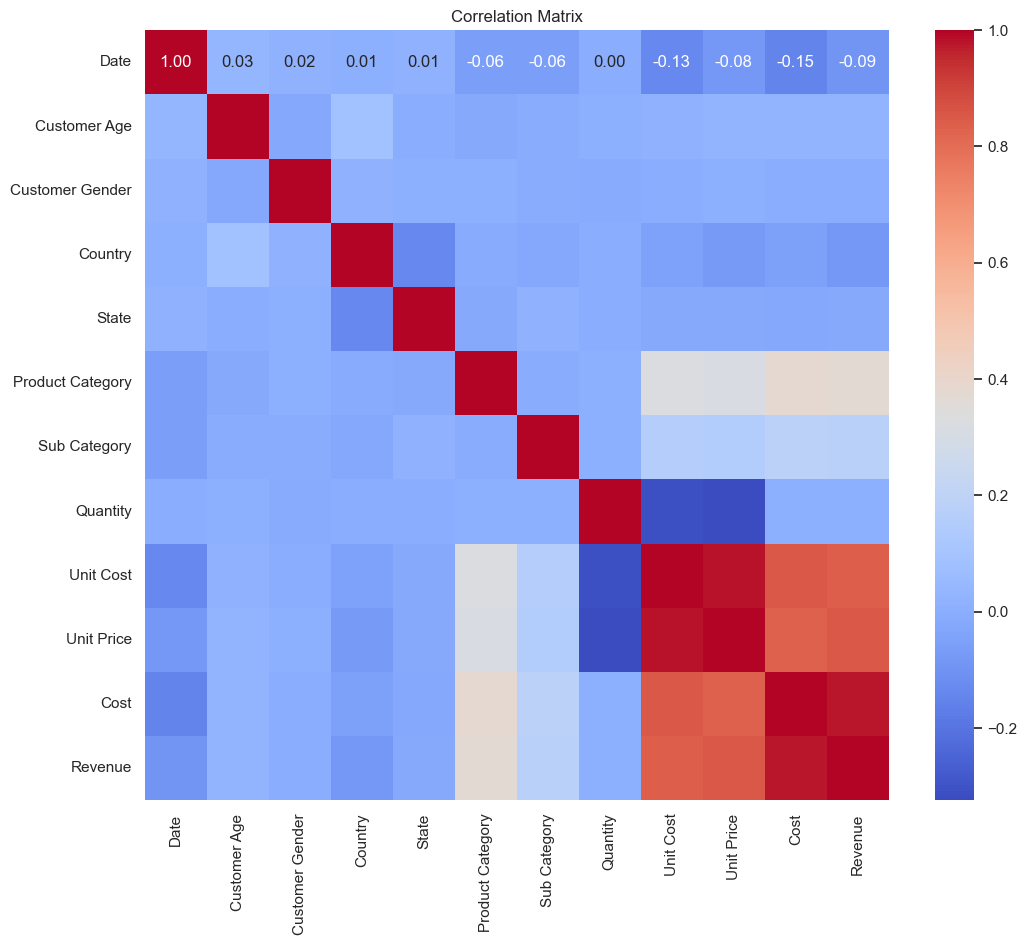

In [14]:
# Computing the correlation matrix for the features in the dataset
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Divide data into input and output

In [15]:
# Defining features and target using the cleaned and prepared dataset
X = data.drop('Product Category', axis=1)
y = data['Product Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27892, 11) (6974, 11) (27892,) (6974,)


# `Modeling`

In [17]:
X_train['Date'] = X_train['Date'].astype('int64') // 10**9
X_test['Date'] = X_test['Date'].astype('int64') // 10**9

In [18]:
# Retraining the Random Forest classifier 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predicting on the testing set again
y_pred = rf_classifier.predict(X_test)

# `Evaluation`

In [20]:
# Evaluation metrics again
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy, class_report)

0.9994264410668197               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4510
           1       1.00      1.00      1.00      1456
           2       1.00      1.00      1.00      1008

    accuracy                           1.00      6974
   macro avg       1.00      1.00      1.00      6974
weighted avg       1.00      1.00      1.00      6974



### Model Performance Evaluation

The Random Forest classifier achieved an overall accuracy of approximately 99.94% on the test set, indicating an excellent level of prediction across all categories. Below are the detailed metrics for each product category:

- **Category 0 (Accessories)**:
  - **Precision**: 100%
  - **Recall**: 100%
  - **F1-Score**: 100%
  - **Support**: 4510 instances

- **Category 1 (Bikes)**:
  - **Precision**: 100%
  - **Recall**: 100%
  - **F1-Score**: 100%
  - **Support**: 1456 instances

- **Category 2 (Clothing)**:
  - **Precision**: 100%
  - **Recall**: 100%
  - **F1-Score**: 100%
  - **Support**: 1008 instances

The model shows no signs of weakness in any of the categories, with perfect scores in precision, recall, and F1 across the board. The `macro avg` and `weighted avg` values also reflect a perfect score of 1.00, which suggests a uniform performance across all classes, irrespective of the number of instances (support).

These results validate the robustness of the model in classifying the product categories with high reliability and precision.


### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

In [21]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[4510,    0,    0],
       [   0, 1456,    0],
       [   2,    2, 1004]], dtype=int64)

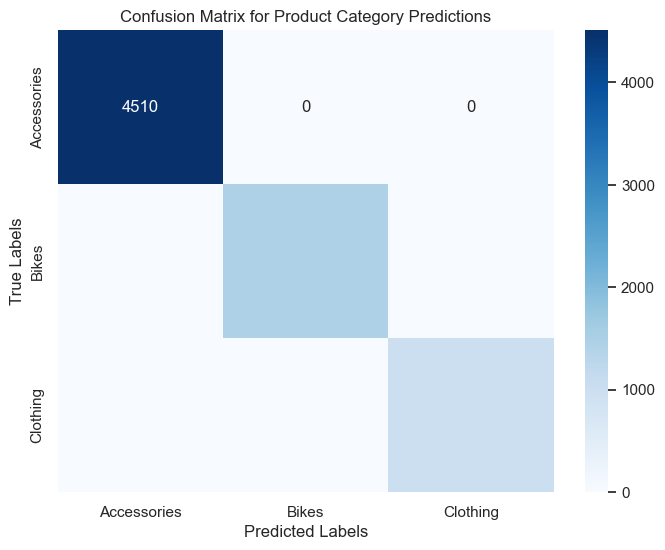

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Product Category'].classes_, yticklabels=label_encoders['Product Category'].classes_)
plt.title('Confusion Matrix for Product Category Predictions')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

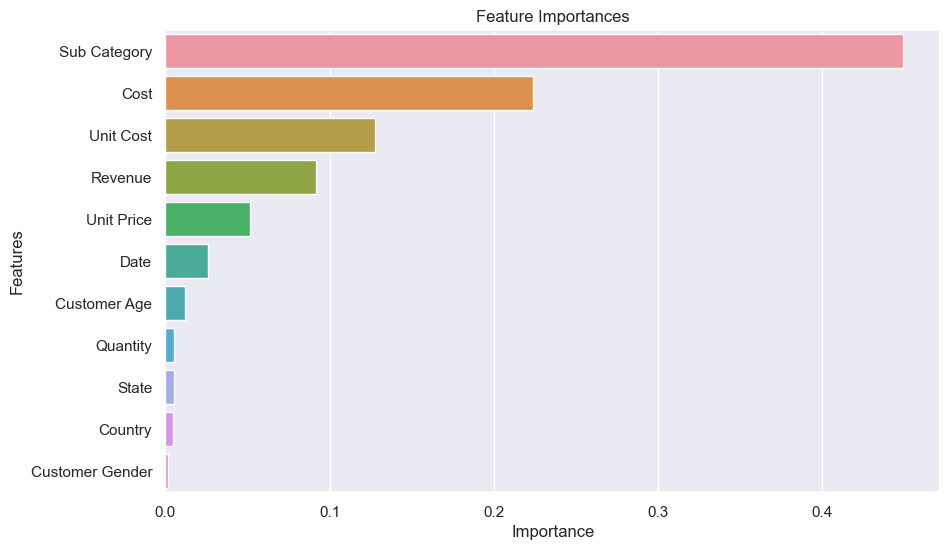

In [23]:
# Plotting feature importances
feature_importances = rf_classifier.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Features': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importances_df)
plt.title('Feature Importances')
plt.show()

### Build a classification Report

In [24]:
# Calculating precision, recall, and F1-scores for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# Computing micro, macro, and weighted F1 scores
f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]
f1_micro = precision_recall_fscore_support(y_test, y_pred, average='micro')[2]
f1_weighted = precision_recall_fscore_support(y_test, y_pred, average='weighted')[2]

# Displaying the results
precision_recall_f1 = pd.DataFrame({
    'Category': label_encoders['Product Category'].classes_,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

precision_recall_f1

,Category,Precision,Recall,F1 Score
0,Accessories,0.999557,1.000000,0.999778
1,Bikes,0.998628,1.000000,0.999314
2,Clothing,1.000000,0.996032,0.998012


### Detailed Model Evaluation Metrics

The table below summarizes the precision, recall, and F1-score for each product category predicted by our model. The metrics provide insights into the model's ability to correctly identify each category, showcasing high effectiveness across the board:

| Category    | Precision | Recall  | F1 Score |
|-------------|-----------|---------|----------|
| Accessories | 99.96%    | 100.00% | 99.98%   |
| Bikes       | 99.86%    | 100.00% | 99.93%   |
| Clothing    | 100.00%   | 99.60%  | 99.80%   |

### Observations:
- **Accessories**: Achieved nearly perfect precision and recall, indicating excellent identification of this category without overfitting.
- **Bikes**: While precision slightly trails that of other categories, it still reflects an exceptional ability to correctly label bike products, paired with perfect recall.
- **Clothing**: Exhibits perfect precision and very high recall, the slightly lower recall compared to other categories suggests minimal instances of false negatives.

Overall, these results demonstrate the model's high reliability and precision in classifying product categories effectively, with particular strengths in minimizing false positives and false negatives across diverse product types.

In [25]:
macro_micro_weighted_f1 = {
    'F1 Macro': f1_macro,
    'F1 Micro': f1_micro,
    'F1 Weighted': f1_weighted
}

macro_micro_weighted_f1

{'F1 Macro': 0.999034635431418,
 'F1 Micro': 0.9994264410668197,
 'F1 Weighted': 0.9994260011297669}

### Aggregate F1 Scores Evaluation

The model's performance can also be assessed by looking at various aggregated F1 scores, which reflect the overall effectiveness across all categories. Here are the computed scores:

- **F1 Macro**: 99.90%
  - This score averages the F1 scores for each class without weighting, reflecting the balance of the model across all categories, irrespective of class support.

- **F1 Micro**: 99.94%
  - The micro-average F1 score aggregates the contributions of all classes to compute the overall score. It is particularly sensitive to the performance on the majority class and is influenced by the total true positives, false negatives, and false positives.

- **F1 Weighted**: 99.94%
  - This version of the F1 score weights each class's score by its support. It shows how precision and recall balance out against the number of instances for each class, providing insight into the performance weighted by class size.

These metrics indicate a very high level of model accuracy and the ability to maintain performance uniformly across different class sizes and distributions.


### Saving our model

In [26]:
from joblib import dump

model_filename = 'random_forest_classifier.joblib'
dump(rf_classifier, model_filename)

model_filename

'random_forest_classifier.joblib'